# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
Record = 1
Set = 1

#Begin Loop
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        Set += 1
        Record = 0
    city_url = url + "&q=" + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (Record, Set, city))
    Record += 1

    #API REQUEST
    try:
        #CREATE JSON VERSION
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        Lat = city_weather["coord"]["lat"]
        Long = city_weather["coord"]["lon"]
        MaxTemp = city_weather["main"]["temp_max"]
        Humidity = city_weather["main"]["humidity"]
        Clouds = city_weather["clouds"]["all"]
        Wind = city_weather["wind"]["speed"]
        Country = city_weather["sys"]["country"]
        Date = city_weather["dt"]

        # City dictionary
        NewDictionary = {"City": city,
                     "Lat": city_lat,
                     "Lng": city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind,
                     "Country": city_country,
                     "Date": city_date}
       
       
        # Append the City information into city_data list
        city_data.append(NewDictionary)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
             
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | middlebury
Processing Record 5 of Set 1 | saint paul
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | viedma
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | vavatenina
Processing Record 10 of Set 1 | florianopolis
Processing Record 11 of Set 1 | christchurch
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | burevestnik
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | hobyo
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | roald
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | clyde river
Processing Record 2

Processing Record 38 of Set 4 | belaya gora
Processing Record 39 of Set 4 | usak
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | miraflores
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | bonnyville
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | tura
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | kodiak
Processing Record 0 of Set 5 | borborema
Processing Record 1 of Set 5 | hinton
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | turukhansk
Processing Record 4 of Set 5 | barcelos
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | arman
Processing Record 8 of Set 5 | opuwo
Processing Record 9 of Set 5 | sungairaya
Processing Record 10 of Set 5 | zeya
Processing Record 11 of Set 5 | torbay
Processing Record 12 of Set 

Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | visimo-utkinsk
City not found. Skipping...
Processing Record 32 of Set 8 | lagoa
Processing Record 33 of Set 8 | barra patuca
Processing Record 34 of Set 8 | kirkwall
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | kenai
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | qibili
City not found. Skipping...
Processing Record 39 of Set 8 | camacha
Processing Record 40 of Set 8 | la sarre
Processing Record 41 of Set 8 | saint-tite
Processing Record 42 of Set 8 | jackson
Processing Record 43 of Set 8 | boulsa
Processing Record 44 of Set 8 | suntar
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | lalomanu
City not found. Skipping...
Processing Record 47 of Set 8 | haines junction
Processing Record 48 of Set 8 | mahajanga
Processing Record 49 of Set 8 | west wendover
Processing Record 0 of Set 9 | natal
Processing Record 1 of Set 9 | mo

Processing Record 13 of Set 12 | joshimath
Processing Record 14 of Set 12 | nibbar
Processing Record 15 of Set 12 | warrington
Processing Record 16 of Set 12 | krasnooktyabrskiy
Processing Record 17 of Set 12 | sarkand
Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | qena
Processing Record 20 of Set 12 | rognan
Processing Record 21 of Set 12 | xining
Processing Record 22 of Set 12 | acapulco
Processing Record 23 of Set 12 | garm
City not found. Skipping...
Processing Record 24 of Set 12 | hanna
Processing Record 25 of Set 12 | angoram
Processing Record 26 of Set 12 | chagda
City not found. Skipping...
Processing Record 27 of Set 12 | hongan
City not found. Skipping...
Processing Record 28 of Set 12 | trairi
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | santa isabel do rio negro
Processing Record 31 of Set 12 | tolaga bay
Processing Record 32 of Set 12 | tawkar
City not found. Skipping...
Processing Record 33 of Set 12 | azar shahr
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
CityDF = pd.DataFrame(city_data)
CityDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,21.273850,17.260176,67.383083,71.470187,57.107325,6.989506,1.630188e+09
std,32.994502,89.079542,15.440537,21.674218,39.200636,5.007933,5.152319e+02
min,-54.800000,-175.200000,32.020000,8.000000,0.000000,0.000000,1.630188e+09
25%,-4.096250,-59.370200,54.875000,61.000000,14.500000,3.345000,1.630188e+09
50%,26.500000,18.715300,70.300000,77.000000,67.000000,5.750000,1.630188e+09
75%,48.826800,98.178050,78.750000,87.000000,98.000000,9.420000,1.630189e+09
max,78.218600,178.416700,107.550000,100.000000,100.000000,32.610000,1.630189e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
BadHumid = CityDF[(CityDF["Humidity"]>100)].index

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

NewCityDF = CityDF.drop(BadHumid)
NewCityDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,85.28,75,4,5.99,US,1630188013
1,ushuaia,-54.8000,-68.3000,42.46,70,40,10.36,AR,1630187893
2,alofi,-19.0595,-169.9187,73.47,57,86,17.07,NU,1630188014
3,middlebury,44.0153,-73.1673,68.76,71,90,4.61,US,1630188014
4,saint paul,44.9444,-93.0933,86.29,67,75,4.61,US,1630188015


In [66]:
Lat = NewCityDF["Lat"]
MaxTemp = NewCityDF["Max Temp"]
Humidity = NewCityDF["Humidity"]
Cloudiness = NewCityDF["Cloudiness"]
Wind = NewCityDF["Wind Speed"]

NewCityDF.to_csv(output_data_file,index_label = "City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

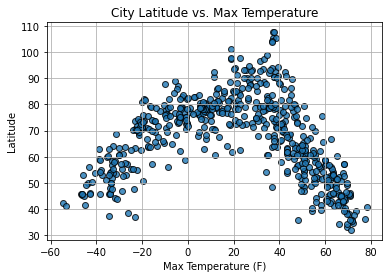

In [23]:
plt.scatter(Lat,MaxTemp, 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

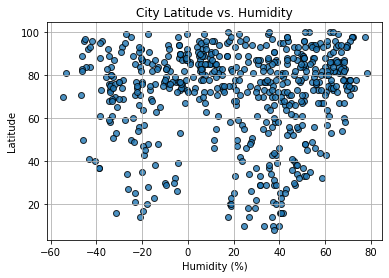

In [24]:
plt.scatter(Lat,Humidity, 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

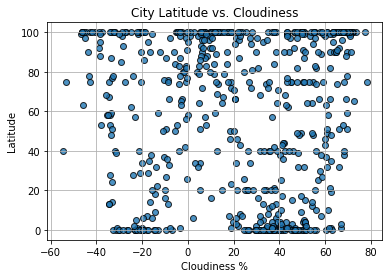

In [25]:
plt.scatter(Lat,Cloudiness, 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness %")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

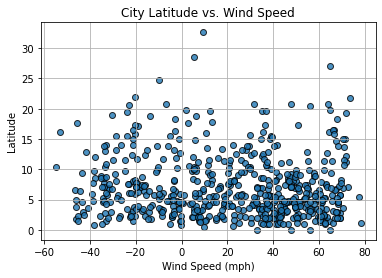

In [26]:
plt.scatter(Lat,Wind, 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [38]:
def plot_linear_regression(xval,yval,title,cordinates):

    (slope,intercept,rvalue,pvalue,stderr) = linregress(xval,yval)
    regressval = xval * slope + intercept
    lineequation = "y = "+ str(round(slope,2)) + "x+ "+ str(round(intercept,2))
    
    plt.scatter(xval,yval)
    plt.plot(xval,yval,regressval, "r-")
    plt.annotate(lineequation,cordinates, fontsize = 14, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue**2}")
    plt.show()

In [41]:
NorthDF = CityDF.loc[(CityDF["Lat"] >= 0)]
SouthDF = CityDF.loc[(CityDF["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.517287111399273


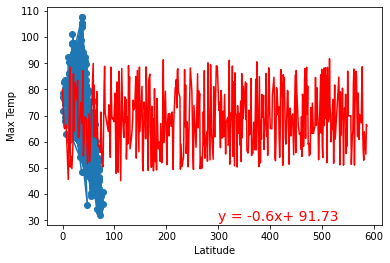

In [73]:
xval = NorthDF["Lat"]
yval = NorthDF["Max Temp"]
plot_linear_regression(xval,yval,'Max Temp',(300,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6421423240375425


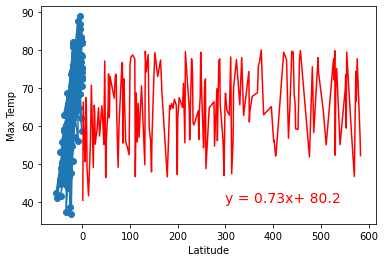

In [74]:
xval = SouthDF["Lat"]
yval = SouthDF["Max Temp"]
plot_linear_regression(xval,yval,'Max Temp',(300,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0016927709707299369


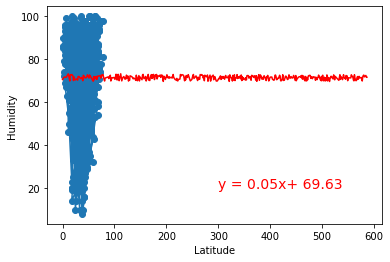

In [75]:
xval = NorthDF["Lat"]
yval = NorthDF["Humidity"]
plot_linear_regression(xval,yval,'Humidity',(300,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0007614265005661778


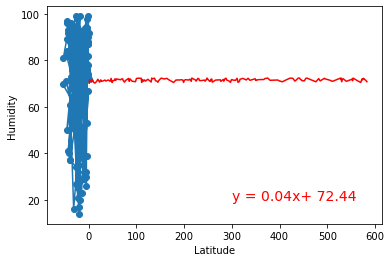

In [76]:
xval = SouthDF["Lat"]
yval = SouthDF["Humidity"]
plot_linear_regression(xval,yval,'Humidity',(300,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0009191203091792799


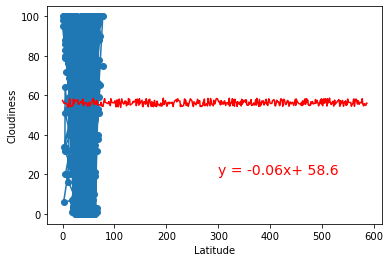

In [77]:
xval = NorthDF["Lat"]
yval = NorthDF["Cloudiness"]
plot_linear_regression(xval,yval,'Cloudiness',(300,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.00856391282454649


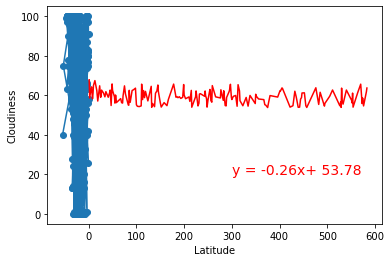

In [78]:
xval = SouthDF["Lat"]
yval = SouthDF["Cloudiness"]
plot_linear_regression(xval,yval,'Cloudiness',(300,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0010470739397574296


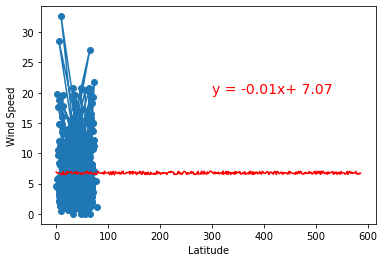

In [79]:
xval = NorthDF["Lat"]
yval = NorthDF["Wind Speed"]
plot_linear_regression(xval,yval,'Wind Speed',(300,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0005234395158239321


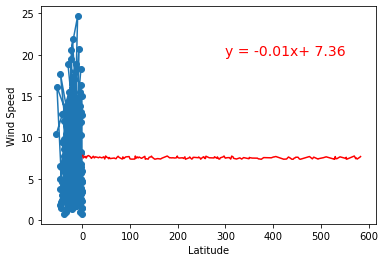

In [80]:
xval = SouthDF["Lat"]
yval = SouthDF["Wind Speed"]
plot_linear_regression(xval,yval,'Wind Speed',(300,20))